# Class 2

In [7]:
import numpy as np
from timeit import timeit
import matplotlib.pylab as plt
%matplotlib notebook

## Experimenting with Numba

In [8]:
def slow_matvec(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        value = 0
        for c in range(matrix.shape[1]):
            value += matrix[r, c] * vector[c]
        result.append(value)
    return np.array(result)


# Example of using this function
matrix = np.random.rand(3, 3)
vector = np.random.rand(3)
print(slow_matvec(matrix, vector))
print(matrix @ vector)

[0.71904199 0.16972256 0.42210275]
[0.71904199 0.16972256 0.42210275]


In [9]:
import numba

In [10]:
@numba.njit
def njit_slow_matvec(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        #Have to add 0.0 and not 0 so that it knows it can be non integer
        value = 0.0
        for c in range(matrix.shape[1]):
            value += matrix[r, c] * vector[c]
        result.append(value)
    return np.array(result)

In [11]:
# Example of using this function
matrix = np.random.rand(3, 3)
vector = np.random.rand(3)
print(njit_slow_matvec(matrix, vector))
print(matrix @ vector)

[0.32755224 0.32487582 0.49997256]
[0.32755224 0.32487582 0.49997256]


In [17]:
def faster_matvec(matrix, vector):
    
    assert matrix.shape[1] == vector.shape[0]
    
    #Take the dot product between each row and the vector
    result = []
    for r in range(matrix.shape[1]):
        result.append(np.dot(matrix[r],vector))
        
    return np.array(result)

### Comparing the run time

In [88]:
#Test the run time for each function for a range of matrix sizes
t_slow = []
t_slow_njit = []
t_fast = []
t_fast_njit = []
t_fast_jit = []
t_numpy = []

nmax = 5000

for n in np.linspace(2,nmax,15,dtype='int'):
    #Create the matrix and vector
    matrix = np.random.rand(n, n)
    vec = np.random.rand(n)
        
    #Time the function for different orderings
    t_slow.append(timeit('slow_matvec(matrix, vec)',globals=globals(),number=1))
    t_slow_njit.append(timeit('njit_slow_matvec(matrix, vec)',globals=globals(),number=1))
    t_fast.append(timeit('faster_matvec(matrix, vec)',globals=globals(),number=1))
    t_numpy.append(timeit('matrix@vec',globals=globals(),number=1))


<IPython.core.display.Javascript object>


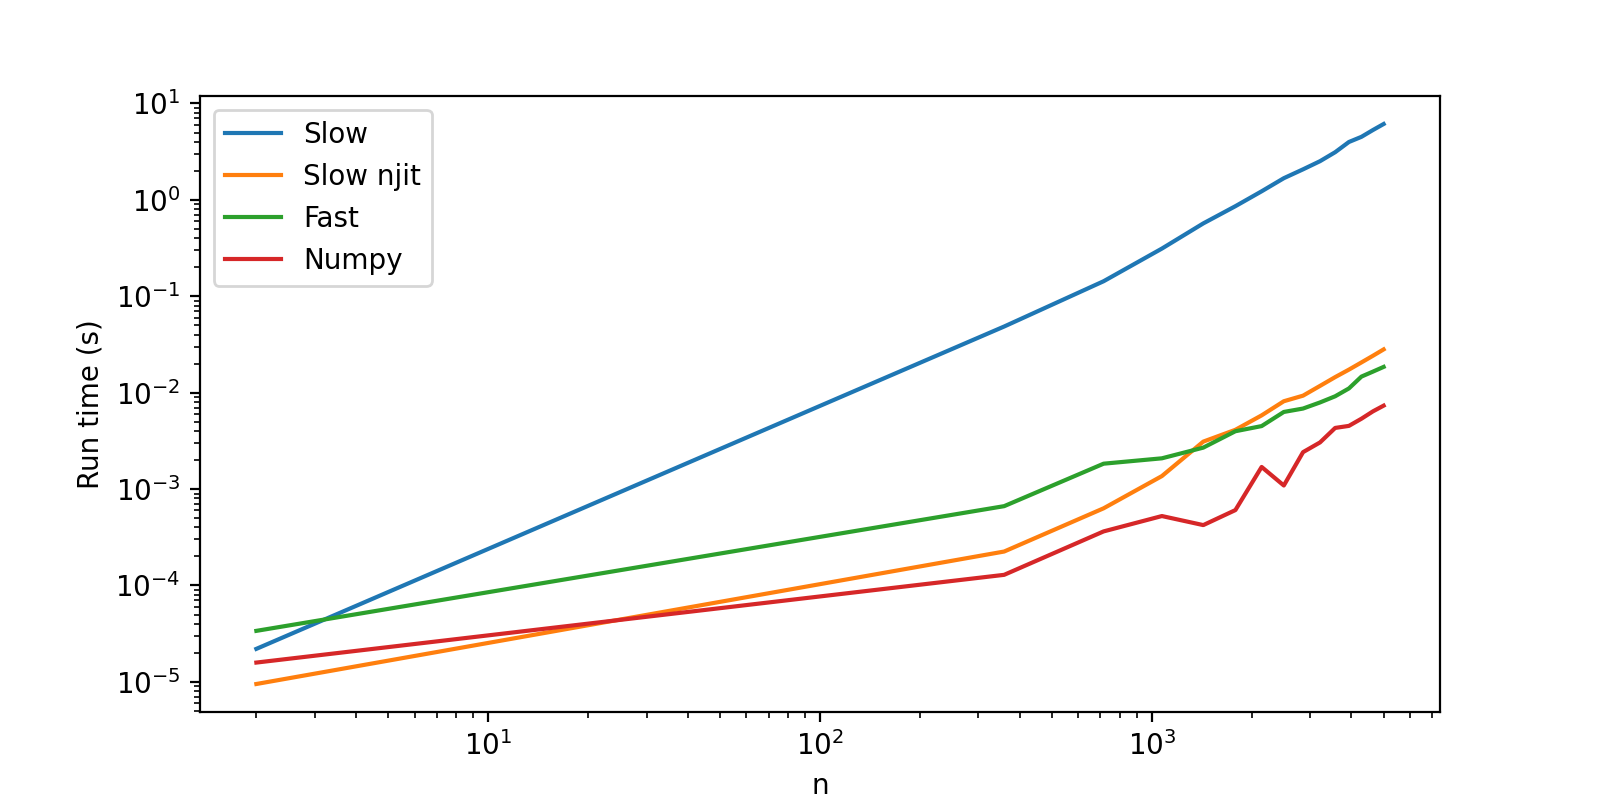

In [89]:
fig,ax = plt.subplots(figsize=(8,4))

ax.plot(np.linspace(2,nmax,15),t_slow,label="Slow")
ax.plot(np.linspace(2,nmax,15),t_slow_njit,label="Slow njit")
ax.plot(np.linspace(2,nmax,15),t_fast,label="Fast")
ax.plot(np.linspace(2,nmax,15),t_numpy,label="Numpy")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("n")
ax.set_ylabel("Run time (s)")
ax.legend();

## jit vs njit

In [90]:
@numba.jit
def jit_faster_matvec(matrix, vector):
    
    assert matrix.shape[1] == vector.shape[0]
    
    #Take the dot product between each row and the vector
    result = []
    for r in range(matrix.shape[1]):
        result.append(np.dot(matrix[r],vector))
        
    return np.array(result)

In [91]:
@numba.njit
def njit_faster_matvec(matrix, vector):
    
    assert matrix.shape[1] == vector.shape[0]
    
    #Take the dot product between each row and the vector
    result = []
    for r in range(matrix.shape[1]):
        result.append(np.dot(matrix[r],vector))
        
    return np.array(result)

In [92]:
#Test the run time for each function for a range of matrix sizes
t_fast_njit = []
t_fast_jit = []
t_numpy = []


for n in np.linspace(2,nmax,15,dtype='int'):
    #Create the matrix and vector
    matrix = np.random.rand(n, n)
    vec = np.random.rand(n)
        
    #Time the function for different orderings
    t_fast_njit.append(timeit('njit_faster_matvec(matrix, vec)',globals=globals(),number=1))
    t_fast_jit.append(timeit('jit_faster_matvec(matrix, vec)',globals=globals(),number=1))
    t_numpy.append(timeit('matrix@vec',globals=globals(),number=1))


<IPython.core.display.Javascript object>


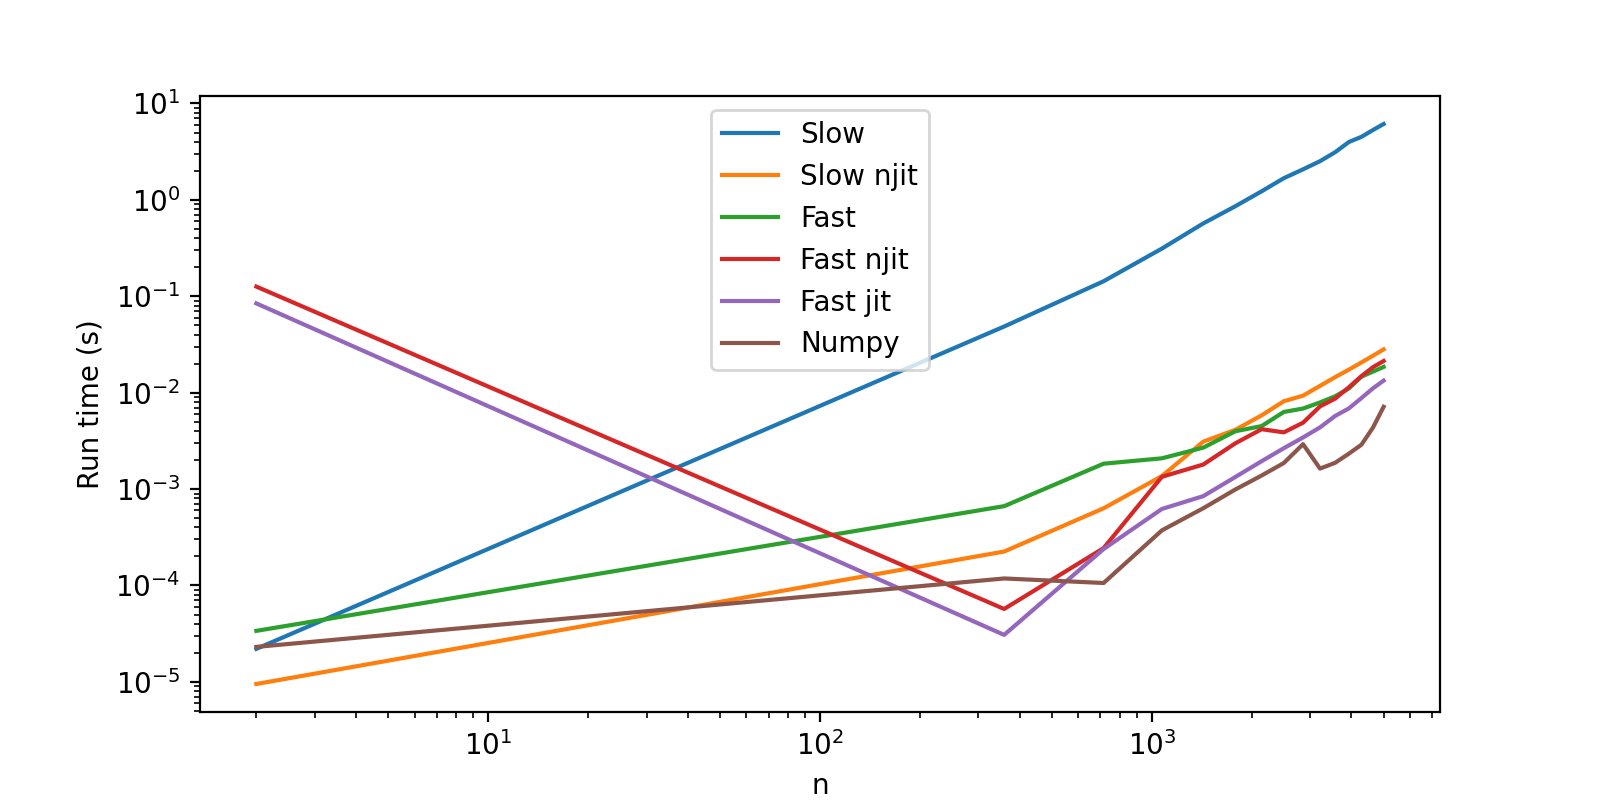

In [93]:
fig,ax = plt.subplots(figsize=(8,4))

ax.plot(np.linspace(2,nmax,15),t_slow,label="Slow")
ax.plot(np.linspace(2,nmax,15),t_slow_njit,label="Slow njit")
ax.plot(np.linspace(2,nmax,15),t_fast,label="Fast")
ax.plot(np.linspace(2,nmax,15),t_fast_njit,label="Fast njit")
ax.plot(np.linspace(2,nmax,15),t_fast_jit,label="Fast jit")
ax.plot(np.linspace(2,nmax,15),t_numpy,label="Numpy")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("n")
ax.set_ylabel("Run time (s)")
ax.legend();

## Parallel range

In [95]:
@numba.njit
def njit_prange_faster_matvec(matrix, vector):
    
    assert matrix.shape[1] == vector.shape[0]

    #Take the dot product between each row and the vector
    result = []
    for r in numba.prange(matrix.shape[1]):
        result.append(np.dot(matrix[r],vector))
        
    return np.array(result)

In [96]:
@numba.jit
def jit_prange_faster_matvec(matrix, vector):
    
    assert matrix.shape[1] == vector.shape[0]

    #Take the dot product between each row and the vector
    result = []
    for r in numba.prange(matrix.shape[1]):
        result.append(np.dot(matrix[r],vector))
        
    return np.array(result)

In [97]:
#Test the run time for each function for a range of matrix sizes
t_fast_prange = []
t_fast_prange_jit = []


for n in np.linspace(2,nmax,15,dtype='int'):
    #Create the matrix and vector
    matrix = np.random.rand(n, n)
    vec = np.random.rand(n)
        
    #Time the function for different orderings
    t_fast_prange.append(timeit('njit_prange_faster_matvec(matrix, vec)',globals=globals(),number=1))
    t_fast_prange_jit.append(timeit('jit_prange_faster_matvec(matrix, vec)',globals=globals(),number=1))
    

<IPython.core.display.Javascript object>


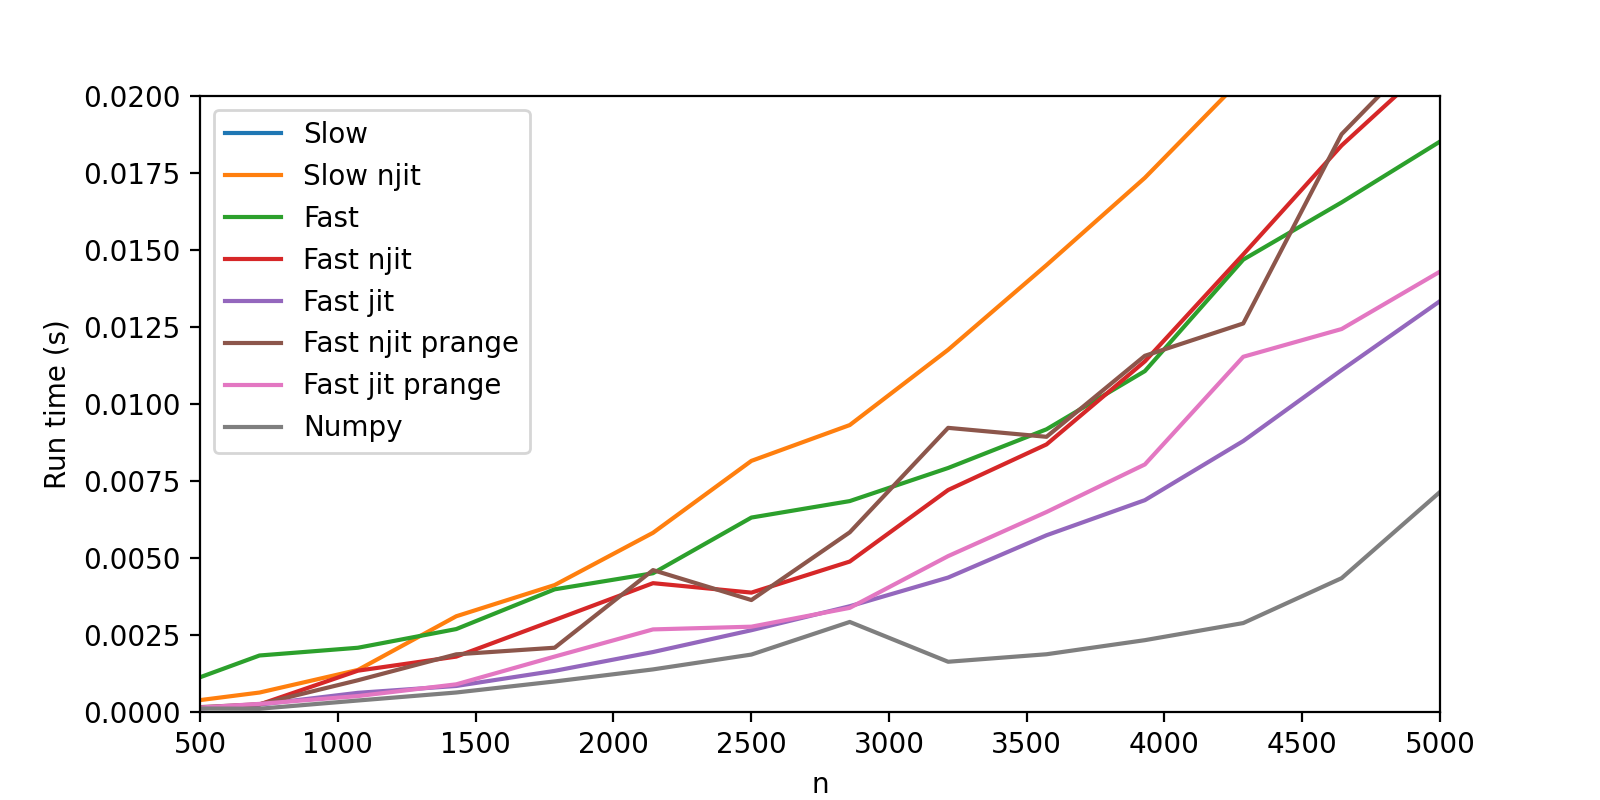

In [116]:
fig,ax = plt.subplots(figsize=(8,4))

ax.plot(np.linspace(2,nmax,15),t_slow,label="Slow")
ax.plot(np.linspace(2,nmax,15),t_slow_njit,label="Slow njit")
ax.plot(np.linspace(2,nmax,15),t_fast,label="Fast")
ax.plot(np.linspace(2,nmax,15),t_fast_njit,label="Fast njit")
ax.plot(np.linspace(2,nmax,15),t_fast_jit,label="Fast jit")
ax.plot(np.linspace(2,nmax,15),t_fast_prange,label="Fast njit prange")
ax.plot(np.linspace(2,nmax,15),t_fast_prange_jit,label="Fast jit prange")
ax.plot(np.linspace(2,nmax,15),t_numpy,label="Numpy")

ax.set_xlim([500,5000])
ax.set_ylim([0,0.02])

#ax.set_xscale("log")
#ax.set_yscale("log")

ax.set_xlabel("n")
ax.set_ylabel("Run time (s)")
ax.legend();